In [210]:
import pandas as pd
import numpy as np
import datetime
import math
from math import *
import matplotlib.pyplot as plt
from scipy.stats import gamma
import seaborn as sns
from scipy.stats import poisson, geom, binom

In [211]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks


In [212]:

df = pd.read_csv("./Cases.csv")
# Getting total data based on State, MICHIGAN, MISSOURI
df['conf_cases'] = df['conf_cases'].fillna(0)
df['prob_cases'] = df['prob_cases'].fillna(0)
df['pnew_case'] = df['pnew_case'].fillna(0)
df['conf_death'] = df['conf_death'].fillna(0)
df['prob_death'] = df['prob_death'].fillna(0)
df['pnew_death'] = df['pnew_death'].fillna(0)

In [213]:
df_mo = df[df['state'] == "MO"]
df_mi = df[df['state'] == "MI"]
df_mo["submission_date"] = pd.to_datetime(df_mo["submission_date"])
df_mi["submission_date"] = pd.to_datetime(df_mi["submission_date"])
df_mi.sort_values(by='submission_date', inplace=True)
df_mo.sort_values(by='submission_date', inplace=True)
df_mo = df_mo[['submission_date', 'new_case', 'new_death']]
df_mi = df_mi[['submission_date', 'new_case', 'new_death']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [214]:
frames = [df_mi, df_mo]
total_data = pd.merge(df_mi, df_mo, on='submission_date')
total_data = total_data.rename(
    columns={'submission_date':'Date','new_case_x': 'new_case_MO', 'new_case_y': 'new_case_MI','new_death_x': 'new_death_MO',
             'new_death_y': 'new_death_MI'})
# total_data["submission_date"] = pd.to_datetime(total_data["submission_date"])
# total_data.sort_values(by=['state', 'submission_date'], inplace=True)
total_data.to_csv('out.csv', encoding='utf-8', index=False)
print(total_data.shape)
# print(total_data.dtypes)
# print("\nGiving a space")
total_data["Year"] = pd.Series(total_data["Date"]).apply(lambda x: x.year)
total_data["Month"] = pd.Series(total_data["Date"]).apply(lambda x: x.month)
print(total_data.info())
total_data = total_data.reindex(columns=['Date','new_case_MO','new_case_MI','new_death_MO','new_death_MI','Year','Month'])
print("Starting and ending date is : \n" + str(total_data['Date'].min()) + "Ending is : " + str(
    total_data['Date'].max()))
print("***************Before Deleting Outlier Data**********************************")

(841, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          841 non-null    datetime64[ns]
 1   new_case_MO   841 non-null    int64         
 2   new_death_MO  841 non-null    int64         
 3   new_case_MI   841 non-null    int64         
 4   new_death_MI  841 non-null    int64         
 5   Year          841 non-null    int64         
 6   Month         841 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 52.6 KB
None
Starting and ending date is : 
2020-01-22 00:00:00Ending is : 2022-05-11 00:00:00
***************Before Deleting Outlier Data**********************************


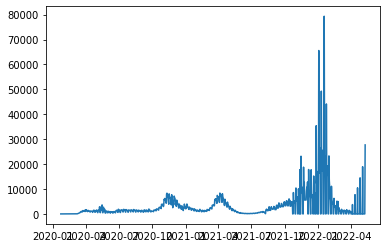

In [215]:
plt.plot("Date", "new_case_MO", data=total_data)
plt.show()

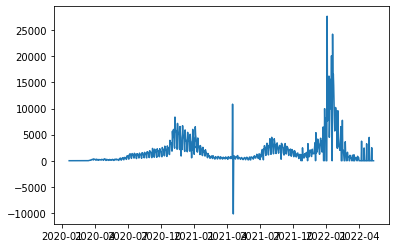

In [216]:
plt.plot("Date", "new_case_MI", data=total_data)
plt.show()

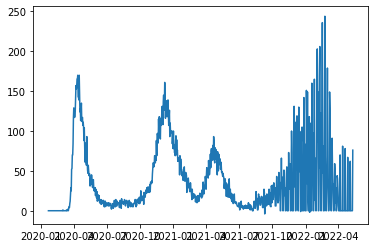

In [217]:
plt.plot("Date", "new_death_MO", data=total_data)
plt.show()

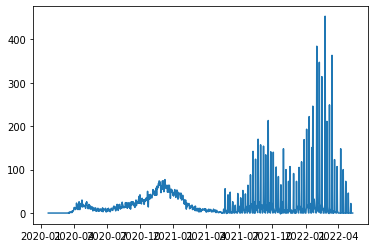

In [218]:
plt.plot("Date", "new_death_MI", data=total_data)
plt.show()

In [219]:
def detect_outliers(data, numerical_attributes):
    outlier_indices = []

    for col in numerical_attributes:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        outlier_list_col = sorted(
            data[((data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)) & data[col] != 0].index)
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)
        print("Outliers in Column " + str(col) + " : " + str(len(outlier_list_col)))
    outlier_indices = list(set(outlier_indices))

    return outlier_indices

In [220]:


numerical_attributes = ['new_case_MO', 'new_case_MI', 'new_death_MO', 'new_death_MI']
outliers_in_data = detect_outliers(total_data, numerical_attributes)
print("These are the number of rows that have Outliers when 0 is not considered to be an outlier:", len(outliers_in_data))

Outliers in Column new_case_MO : 41
Outliers in Column new_case_MI : 30
Outliers in Column new_death_MO : 26
Outliers in Column new_death_MI : 37
These are the number of rows that have Outliers when 0 is not considered to be an outlier: 114


In [221]:
new_data = total_data.copy()

total_data= total_data[~total_data.index.isin(outliers_in_data)]

print("Dataset information after removing the outliers: \n")
print(total_data.describe())
print("\n")
print("\n")
print("**************** After Removing Outlier Data****************************")

Dataset information after removing the outliers: 

        new_case_MO   new_case_MI  new_death_MO  new_death_MI         Year  \
count    727.000000    727.000000    727.000000    727.000000   727.000000   
mean    1866.863824   1227.821183     28.159560     14.433287  2020.711142   
std     2410.623563   1651.348478     35.069775     23.164774     0.681656   
min        0.000000      0.000000     -4.000000     -2.000000  2020.000000   
25%      340.000000    241.500000      5.000000      1.000000  2020.000000   
50%     1284.000000    738.000000     14.000000      8.000000  2021.000000   
75%     2333.000000   1745.000000     40.000000     18.000000  2021.000000   
max    25560.000000  20116.000000    244.000000    314.000000  2022.000000   

            Month  
count  727.000000  
mean     5.932600  
std      3.215342  
min      1.000000  
25%      3.000000  
50%      6.000000  
75%      9.000000  
max     12.000000  




**************** After Removing Outlier Data******************

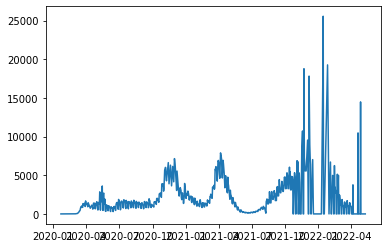

In [222]:
plt.plot("Date", "new_case_MO", data=total_data)
plt.show()

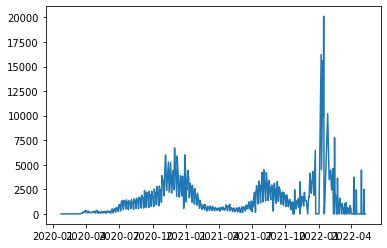

In [223]:
plt.plot("Date", "new_case_MI", data=total_data)
plt.show()

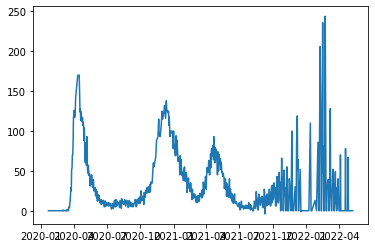

In [224]:
plt.plot("Date", "new_death_MO", data=total_data)
plt.show()

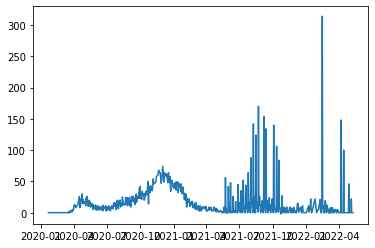

In [225]:
plt.plot("Date", "new_death_MI", data=total_data)
plt.show()

In [226]:
#Considering data only for February and March months for year 2021
# total_data = new_data
feb_cases = total_data[(total_data.Date > '2021-01-31') & (total_data.Date < '2021-03-01')]

feb_mo_cases = feb_cases['new_case_MO'].to_numpy()
feb_mo_deaths = feb_cases['new_death_MO'].to_numpy()

feb_mi_cases = feb_cases['new_case_MI'].to_numpy()
feb_mi_deaths = feb_cases['new_death_MI'].to_numpy()



march_cases = total_data[(total_data.Date > '2021-02-28') & (total_data.Date <= '2021-03-31')]
# print(march_cases)

march_mo_cases = march_cases['new_case_MO'].to_numpy()
march_mo_deaths = march_cases['new_death_MO'].to_numpy()

march_mi_cases = march_cases['new_case_MI'].to_numpy()
march_mi_deaths = march_cases['new_death_MI'].to_numpy()
print("Number of data points for February month: "+str(len(feb_cases)))
print("Number of data points for March month: "+str(len(march_cases)))
n = total_data.shape[0]
print(n)

Number of data points for February month: 28
Number of data points for March month: 30
727


In [227]:
true_std_conf_MO = np.sqrt(
    (1 / (n)) * sum(np.square(total_data["new_case_MO"] - total_data["new_case_MO"].mean()))
)
true_std_conf_MI = np.sqrt(
    (1 / (n)) * sum(np.square(total_data["new_case_MO"] - total_data["new_case_MI"].mean()))
)
true_std_death_MO = np.sqrt(
    (1 / (n)) * sum(np.square(total_data["new_case_MO"] - total_data["new_death_MO"].mean()))
)
true_std_death_MI = np.sqrt(
    (1 / (n)) * sum(np.square(total_data["new_case_MO"] - total_data["new_death_MI"].mean()))
)

print(true_std_conf_MO)
print(true_std_conf_MI)
print(true_std_death_MO)
print(true_std_death_MI)

2408.9650672744865
2492.2857364982747
3030.502609496441
3038.8503727109687


In [228]:
#Defining Wald's test 
#Assuming poisson's distribution 

def walds_test(feb, march):
    
    feb_mean = feb.mean()
    march_mean = march.mean()
    print("February Month Mean: "+str(feb_mean))
    print("March Month Mean: "+str(march_mean))
    #Variance and mean are equal for poisson distribution
    standard_error = math.sqrt(march_mean/len(march))
    #computing the W statistic 
    W = np.abs((march_mean - feb_mean)/standard_error)
    Z_alpha = 1.96
    print("Walds w-statistics :")
    print(str(W) + "\n")
    if(W <= Z_alpha):
        return "Accept Ho since the value of W statistic "+ str(W)+" is less than threshold value 1.96"
    else:
        return "Reject Ho since the value of W statistic "+ str(W)+" is greater than threshold value 1.96"

In [229]:
print("Procedure:")
print("")
print("Results for every column:")
print("Missouri Confirmed Cases")
print(walds_test(feb_mo_cases,march_mo_cases))
print("\n")
print("Missouri Deaths")
print(walds_test(feb_mo_deaths,march_mo_deaths))
print("\n")
print("Michigan Confirmed Cases")
print(walds_test(feb_mi_cases,march_mi_cases))
print("\n")
print("Michigan Deaths")
print(walds_test(feb_mi_deaths,march_mi_deaths))
print("\n")

Procedure:

Results for every column:
Missouri Confirmed Cases
February Month Mean: 1247.0714285714287
March Month Mean: 3430.4333333333334
Walds w-statistics :
204.17937212740563

Reject Ho since the value of W statistic 204.17937212740563 is greater than threshold value 1.96


Missouri Deaths
February Month Mean: 29.285714285714285
March Month Mean: 20.933333333333334
Walds w-statistics :
9.998888538258635

Reject Ho since the value of W statistic 9.998888538258635 is greater than threshold value 1.96


Michigan Confirmed Cases
February Month Mean: 881.7857142857143
March Month Mean: 543.7333333333333
Walds w-statistics :
79.40569429496196

Reject Ho since the value of W statistic 79.40569429496196 is greater than threshold value 1.96


Michigan Deaths
February Month Mean: 16.535714285714285
March Month Mean: 7.533333333333333
Walds w-statistics :
17.964884199313513

Reject Ho since the value of W statistic 17.964884199313513 is greater than threshold value 1.96




In [230]:
#Defining the Z test 

def z_test(feb,march,true_dev):
    feb_mean = feb.mean()
    march_mean = march.mean()
    print("February Month Mean: "+str(feb_mean))
    print("March Month Mean: "+str(march_mean))

    standard_error = true_dev/math.sqrt(len(march))
    #computing the Z statistic 
    Z = np.abs((march_mean - feb_mean)/standard_error)
    Z_alpha = 1.96
    if(Z <= Z_alpha):
        return "Accept Ho since Z value is : "+ str(Z)
    else:
        return "Reject Ho since Z value is : "+ str(Z)

In [231]:
print("Results:\n")
print("Missouri Confirmed Cases")
print(z_test(feb_mo_cases,march_mo_cases,true_std_conf_MO))
print("\n")
print("Missouri Deaths")
print(z_test(feb_mo_deaths,march_mo_deaths,true_std_death_MO))
print("\n")
print("Michigan Confirmed Cases")
print(z_test(feb_mi_cases,march_mi_cases,true_std_conf_MI))
print("\n")
print("Michigan Deaths")
print(z_test(feb_mi_deaths,march_mi_deaths,true_std_death_MI))
print("\n")

Results:

Missouri Confirmed Cases
February Month Mean: 1247.0714285714287
March Month Mean: 3430.4333333333334
Reject Ho since Z value is : 4.964275251149911


Missouri Deaths
February Month Mean: 29.285714285714285
March Month Mean: 20.933333333333334
Accept Ho since Z value is : 0.015095804379642795


Michigan Confirmed Cases
February Month Mean: 881.7857142857143
March Month Mean: 543.7333333333333
Accept Ho since Z value is : 0.7429281159635485


Michigan Deaths
February Month Mean: 16.535714285714285
March Month Mean: 7.533333333333333
Accept Ho since Z value is : 0.016225896355914024




In [232]:
#T test 

def t_test(feb,march):
    feb_mean = feb.mean()
    march_mean = march.mean()
    
    # sample_standard_deviation = np.sqrt(np.sum(np.square(march - march_mean))/(len(march))) 
    sample_standard_deviation = np.sqrt((1 / (len(march - 1))) * sum(np.square(march - march_mean)))
    denominator = sample_standard_deviation/math.sqrt(len(march))
    #computing the T statistic 
    T = np.abs((march_mean - feb_mean)/denominator)
    T_alpha = 2.04523
    if(T <= T_alpha):
        return "Accept Ho since T value is "+ str(T)
    else:
        return "Reject Ho since T value is "+ str(T)

In [233]:
print("The number of data points for the March month is : " +str(len(march_cases)))
print("Therefore the threshold value for T test for degree of freedom 29 and alpha/2 = 0.025 is 2.04523")
print("Missouri Confirmed Cases")
print(t_test(feb_mo_cases,march_mo_cases))
print("\n")
print("Missouri Deaths")
print(t_test(feb_mo_deaths,march_mo_deaths))
print("\n")
print("Michigan Confirmed Cases")
print(t_test(feb_mi_cases,march_mi_cases))
print("\n")
print("Michigan Deaths")
print(t_test(feb_mi_deaths,march_mi_deaths))
print("\n")

The number of data points for the March month is : 30
Therefore the threshold value for T test for degree of freedom 29 and alpha/2 = 0.025 is 2.04523
Missouri Confirmed Cases
Reject Ho since T value is 6.903600353750057


Missouri Deaths
Reject Ho since T value is 5.763893749279891


Michigan Confirmed Cases
Reject Ho since T value is 13.657101473555631


Michigan Deaths
Reject Ho since T value is 17.23782149635006




In [234]:
#2 SAMPLE TESTS 

#Walds Test 
#null hypothesis is that both the means are equal, so theta0 = 0


def walds_test_2(feb,march):
    feb_mean = feb.mean()
    march_mean = march.mean()
    
    standard_error = np.sqrt((feb_mean/len(feb)) + march_mean/len(march))
    #w value of waltz
    W = np.abs((feb_mean - march_mean)/standard_error)
    Z_alpha = 1.96
    if(W <= Z_alpha):
        return "Accept Ho since the value of W statistic "+ str(W)+" is less than threshold value 1.96"
    else:
        return "Reject Ho since the value of W statistic "+ str(W)+" is greater than threshold value 1.96"

In [235]:
print("Missouri Confirmed Cases")
print(walds_test_2(feb_mo_cases,march_mo_cases))
print("\n")
print("Missouri Deaths")
print(walds_test_2(feb_mo_deaths,march_mo_deaths))
print("\n")
print("Michigan Confirmed Cases")
print(walds_test_2(feb_mi_cases,march_mi_cases))
print("\n")
print("Michigan Deaths")
print(walds_test_2(feb_mi_deaths,march_mi_deaths))
print("\n")

Missouri Confirmed Cases
Reject Ho since the value of W statistic 173.2139453002994 is greater than threshold value 1.96


Missouri Deaths
Reject Ho since the value of W statistic 6.325209150992754 is greater than threshold value 1.96


Michigan Confirmed Cases
Reject Ho since the value of W statistic 47.99208975283848 is greater than threshold value 1.96


Michigan Deaths
Reject Ho since the value of W statistic 9.812639876251579 is greater than threshold value 1.96




In [236]:
#Unpaired T test 

def t_test_2(feb,march):
    feb_mean = feb.mean()
    march_mean = march.mean()
    D = feb_mean - march_mean
    
    standard_deviation_feb_square = (1/(len(feb)-1))*np.sum(np.square(feb-feb_mean))
    standard_deviation_march_square = (1/(len(march)-1))*np.sum(np.square(march-march_mean))
    
    sample_pooled_standard_deviation = np.sqrt((standard_deviation_feb_square/len(feb)) + (standard_deviation_march_square/len(march)))
    
    #Calculating the T statistic:
    T = np.abs(D/sample_pooled_standard_deviation)
    T_alpha = 2.30687
    if(T <= T_alpha):
       return "Accept Ho since the value of T statistic "+ str(T)+" is less than threshold value 2.30687"
    else:
        return "Reject Ho since the value of W statistic "+ str(T)+" is greater than threshold value 2.30687"

In [237]:
print("Results:\n")
print("Missouri Confirmed Cases")
print(t_test_2(feb_mo_cases,march_mo_cases))
print("\n")
print("Missouri Deaths")
print(t_test_2(feb_mo_deaths,march_mo_deaths))
print("\n")
print("Michigan Confirmed Cases")
print(t_test_2(feb_mi_cases,march_mi_cases))
print("\n")
print("Michigan Deaths")
print(t_test_2(feb_mi_deaths,march_mi_deaths))

Results:

Missouri Confirmed Cases
Reject Ho since the value of W statistic 6.713277826100857 is greater than threshold value 2.30687


Missouri Deaths
Reject Ho since the value of W statistic 3.4732331223916315 is greater than threshold value 2.30687


Michigan Confirmed Cases
Reject Ho since the value of W statistic 3.85686572489355 is greater than threshold value 2.30687


Michigan Deaths
Reject Ho since the value of W statistic 7.343079178240679 is greater than threshold value 2.30687


In [238]:
### Binomial distribution ###
def get_binomial_value(data_state1, data_state2):
    """
    Binomial CDF 
    parameter: state1_data, state2_data
    
    return: CDF, x_coordinates
    """
    
    # Calculate MME p_mme and n_mme value
    mean = data_state1.mean()
    variance = data_state1.var()
    p_mme = 1 - (variance / mean)
    n_mme = (mean ** 2)/(mean - variance)
    print("p_mme is ", p_mme)
    print("n_mme is ", n_mme)
    F_D = []
    for i in range(data_state2.shape[0]):
        F_D.append(binom.cdf(data_state2[i], n_mme, p_mme))
        
    F_D = np.asarray(F_D)
    F_D_dict = {}
    for i in range(data_state2.shape[0]):
        if data_state2[i] not in F_D_dict:
            F_D_dict[data_state2[i]] = F_D[i]
    keys = sorted(F_D_dict.keys())
    CFD = []
    for i in range(len(keys)):
        CFD.append(F_D_dict[keys[i]])
    return CFD, keys

In [239]:
### Poission distribution ###
def get_poisson_cdf_value(data_state1, data_state2):
    """
    Poisson CDF 
    parameter: state1_data, state2_data
    
    return: CDF, x_coordinates
    """
    # Calculate MME lambda_mme value equals mean
    mean = data_state1.mean()
    print('lambda is: ', mean)
    sum_val = 0
    F_D = []
    for i in range(data_state2.shape[0]):
        F_D.append(poisson.cdf(data_state2[i], mean))
    F_D = np.asarray(F_D)
    F_D_dict = {}
    for i in range(data_state2.shape[0]):
        if data_state2[i] not in F_D_dict:
            F_D_dict[data_state2[i]] = F_D[i]
    keys = sorted(F_D_dict.keys())
    CFD = []
    for i in range(len(keys)):
        CFD.append(F_D_dict[keys[i]])
    return CFD, keys

In [240]:
### Geometric distribution ###
def get_geometric_cdf_value(data_state1, data_state2):
    """
    Geometric CDF 
    parameter: state1_data, state2_data
    
    return: CDF, x_coordinates
    """
    # Calculate MME p_mme value equals 1/mean
    mean = data_state1.mean()
    p_mme = 1/mean
    print("p_mme is ",p_mme)
    sum_val = 0
    F_D = []
    
    for i in range(data_state2.shape[0]):
        F_D.append((1 - ((1-p_mme) ** data_state2[i])))
    F_D = np.asarray(F_D)
    
    F_D_dict = {}
    for i in range(data_state2.shape[0]):
        if data_state2[i] not in F_D_dict:
            F_D_dict[data_state2[i]] = F_D[i]
    keys = sorted(F_D_dict.keys())
    CFD = []
    for i in range(len(keys)):
        CFD.append(F_D_dict[keys[i]])
    return CFD, keys

In [241]:
### Calculate CDF ###
def get_data_cdf(data):
    pdf_dict = {}
    for i in range(data.shape[0]):
        if data[i] in pdf_dict:
            pdf_dict[data[i]] += 1
        else:
            pdf_dict[data[i]] = 1
    n = data.shape[0]
    for i in pdf_dict:
        pdf_dict[i] = pdf_dict[i]/n
        
    keys = sorted(pdf_dict.keys())
    CDF = []
    cumulate = 0
    for i in keys:
        cumulate += pdf_dict[i]
        CDF.append(cumulate)
    return CDF, keys

In [242]:
print("\n\n###### One Sample KS test ######\n")
def one_sanmple_KS_test(x, F_x, F_x_cap):
    """
    1-Sample CDF 
    parameter: data, state1_data, state2_data
    
    return: CDF, x_coordinates
    """
    f_max = max((F_x[0] - 0), (F_x[0] - F_x_cap[0]))
    j = 0
    result = True
    for i in range(1, len(x)):
        if(f_max < (F_x[i] - F_x_cap[i-1])):
            f_max = (F_x[i] - F_x_cap[i-1])
            j = i
        if(f_max < (F_x[i] - F_x_cap[i])):
            f_max = (F_x[i] - F_x_cap[i])
            j = i
    print("Maximum distance is: ", f_max)
    if(f_max > c):
        result = False
        print("Reject H_0")
    else:
        print('Accpet H_0')
    return f_max, result, j



###### One Sample KS test ######



In [243]:
def draw_all_for_ks(x_1, y_1, label_1, x_2, y_2, label_2, max_x):
    t = "eCDF"
    plt.title(t)
    plt.step(x_1,y_1,label=label_1)
    plt.step(x_2,y_2,label=label_2)
    plt.axvline(max_x, 0, 1, label='maximum distance', color="red")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [244]:
c = 0.05
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 839
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          727 non-null    datetime64[ns]
 1   new_case_MO   727 non-null    int64         
 2   new_case_MI   727 non-null    int64         
 3   new_death_MO  727 non-null    int64         
 4   new_death_MI  727 non-null    int64         
 5   Year          727 non-null    int64         
 6   Month         727 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 45.4 KB
None


In [245]:
total_data = total_data.loc[(total_data["Month"] >= 10) & (total_data["Month"] <= 12) & (total_data["Year"] == 2021)]
print(total_data)
total_data = total_data.drop(columns=["Date", "Year", "Month"])
columns = total_data.columns
total_data_npy = total_data.to_numpy().astype("int")


          Date  new_case_MO  new_case_MI  new_death_MO  new_death_MI  Year  \
618 2021-10-01         4774         1724            32             7  2021   
619 2021-10-02         3271         1010            14             2  2021   
620 2021-10-03         3271          762            14             0  2021   
621 2021-10-04         3274         1181            17           140  2021   
622 2021-10-05         4352         1932            35            12  2021   
..         ...          ...          ...           ...           ...   ...   
701 2021-12-23            0         6468             0            11  2021   
702 2021-12-24            0           17             0             0  2021   
703 2021-12-25            0            0             0             0  2021   
704 2021-12-26            0            0             0             0  2021   
709 2021-12-31            0            0             0             0  2021   

     Month  
618     10  
619     10  
620     10  
621     10 

#########Poission destribution#########
Confirmed cases for MO(State1) and MI(State2)
lambda is:  3973.205882352941
Maximum distance is:  0.04032134504937168
Accpet H_0


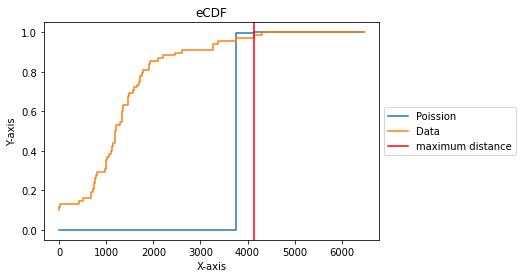

Confirmed deaths for MO(State1) and MI(State2)
lambda is:  22.220588235294116
Maximum distance is:  0.04411764705882382
Accpet H_0


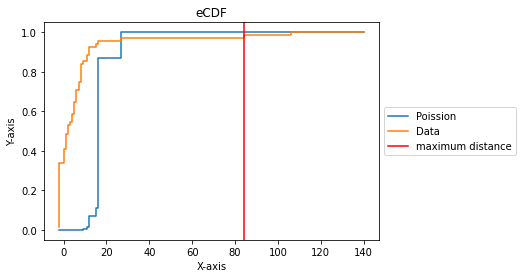

In [246]:

flag = True
print("#########Poission destribution#########")
for i in range(0, 4, 2):
    if flag:
        print("Confirmed cases for MO(State1) and MI(State2)")
    else:
        print("Confirmed deaths for MO(State1) and MI(State2)")
    flag = not flag

    CDF_geometric, X_geometric = get_poisson_cdf_value(total_data_npy[:, i], total_data_npy[:, i + 1])
    CDF_data, X_data = get_data_cdf(total_data_npy[:, i + 1])
    f_max, result, max_x = one_sanmple_KS_test(X_data, CDF_geometric, CDF_data)
    draw_all_for_ks(
        X_data, CDF_geometric, "Poission", X_data, CDF_data, "Data", X_data[max_x]
    )

#########Geometric destribution#########
Confirmed cases for MO(State1) and MI(State2)
p_mme is  0.0002516859255749913
Maximum distance is:  0.00728627808293783
Accpet H_0


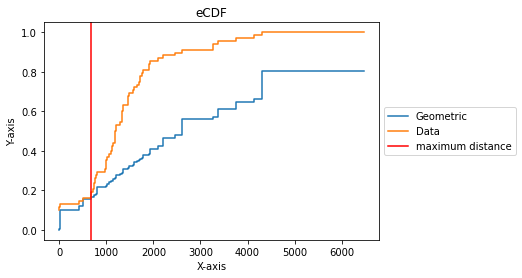

Confirmed deaths for MO(State1) and MI(State2)
p_mme is  0.045003309066843154
Maximum distance is:  0.02321714072706682
Accpet H_0


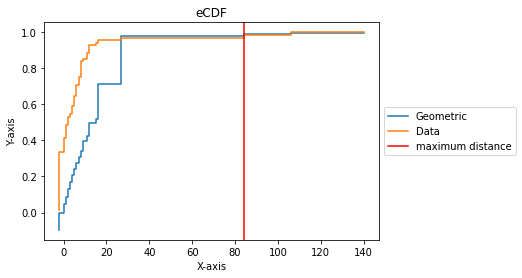

In [247]:
print("#########Geometric destribution#########")
for i in range(0, 4, 2):
    if flag:
        print("Confirmed cases for MO(State1) and MI(State2)")
    else:
        print("Confirmed deaths for MO(State1) and MI(State2)")
    flag = not flag

    CDF_geometric, X_geometric = get_geometric_cdf_value(total_data_npy[:, i], total_data_npy[:, i + 1])
    CDF_data, X_data = get_data_cdf(total_data_npy[:, i + 1])
    f_max, result, max_x = one_sanmple_KS_test(X_data, CDF_geometric, CDF_data)
    draw_all_for_ks(
        X_data, CDF_geometric, "Geometric", X_data, CDF_data, "Data", X_data[max_x]
    )

#########Binomial destribution#########
Confirmed cases for MO(State1) and MI(State2)
p_mme is  -3601.2680644524985
n_mme is  -1.103279681279985
Maximum distance is:  1.0
Reject H_0


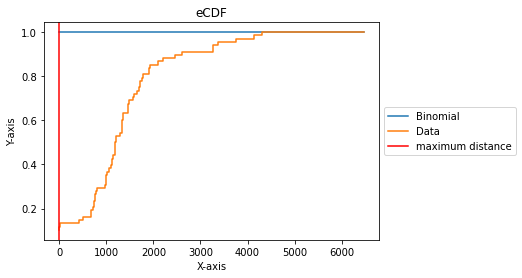

Confirmed deaths for MO(State1) and MI(State2)
p_mme is  -28.86875656947093
n_mme is  -0.7697106102170215
Maximum distance is:  nan
Accpet H_0


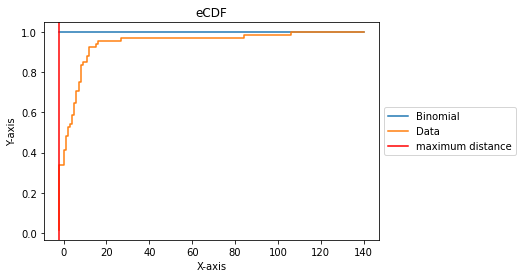

In [248]:
print("#########Binomial destribution#########")
for i in range(0, 4, 2):
    if flag:
        print("Confirmed cases for MO(State1) and MI(State2)")
    else:
        print("Confirmed deaths for MO(State1) and MI(State2)")
    flag = not flag

    CDF_geometric, X_geometric = get_binomial_value(total_data_npy[:, i], total_data_npy[:, i + 1])
    CDF_data, X_data = get_data_cdf(total_data_npy[:, i + 1])
    f_max, result, max_x = one_sanmple_KS_test(X_data, CDF_geometric, CDF_data)
    draw_all_for_ks(
        X_data, CDF_geometric, "Binomial", X_data, CDF_data, "Data", X_data[max_x]
    )



###### Two Sample KS Test ######

Confirmed cases for MO(State1) and MI(State2)
Maximum distance is:  0.6617647058823529
Reject H_0


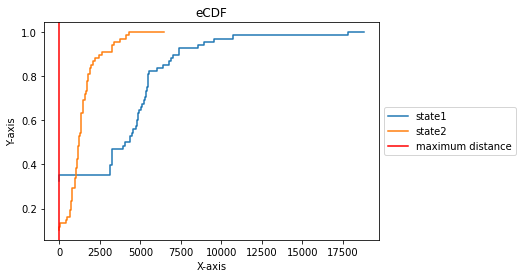

#################################################
Confirmed deaths for MO(State1) and MI(State2)
Maximum distance is:  0.8088235294117647
Reject H_0


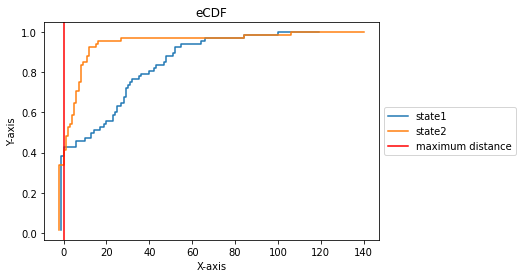

#################################################


In [249]:
print("\n\n###### Two Sample KS Test ######\n")


def two_sample_KS(state1, state2):
    sort_state1 = np.sort(state1)
    sort_state2 = np.sort(state2)

    size = int(max(max(sort_state1), max(sort_state2)))
    serched1 = np.ones(size)
    serched2 = np.ones(size)
    max_cdf_dist = 0
    max_distance = 0

    for i in range(int(max(max(sort_state1), max(sort_state2)))):
        serched1[i] = np.searchsorted(state1, i, side="right") / len(state1)
        serched2[i] = np.searchsorted(state2, i, side="right") / len(state2)

        temp_max_distance = max(
            abs(serched1[i] - serched2[i]),
            abs(np.searchsorted(state1, i, side="left") / len(state1) - serched2[i]),
        )
        if temp_max_distance > max_cdf_dist:
            max_cdf_dist = temp_max_distance
            max_distance = i

    print("Maximum distance is: ", max_cdf_dist)
    if max_cdf_dist > c:
        print("Reject H_0")
    else:
        print("Accept H_0")

    CDF_1, keys1 = get_data_cdf(state1)
    CDF_2, keys2 = get_data_cdf(state2)
    draw_all_for_ks(keys1, CDF_1, "state1", keys2, CDF_2, "state2", max_distance)
    print("#################################################")


for i in range(0, 4, 2):
    if flag:
        print("Confirmed cases for MO(State1) and MI(State2)")
    else:
        print("Confirmed deaths for MO(State1) and MI(State2)")
    flag = not flag
    two_sample_KS(total_data_npy[:, i], total_data_npy[:, i + 1])


In [121]:
print("\n\n###### Permutation test ######\n")


def permutation_test(state1, state2):
    data_combined = np.append(state1, state2)
    state1 = list(state1)
    state2 = list(state2)
    df_numpy = df.to_numpy()

    T_obs = abs(np.asarray(state2).mean() - np.asarray(state1).mean())
    split = len(state1)
    n = 1000
    c = 0.05
    temp_set = data_combined.copy()
    sum_of_mean_diff = 0
    for i in range(n):
        np.random.seed(i)
        np.random.shuffle(temp_set)
        D1_temp = temp_set[:split]
        D2_temp = temp_set[split:]
        D1_temp_mean = D1_temp.mean()
        D2_temp_mean = D2_temp.mean()
        T_i = abs(D2_temp_mean - D1_temp_mean)
        if T_i > T_obs:
            sum_of_mean_diff += 1
    p_value = sum_of_mean_diff / n
    print("p-value = ", p_value)
    if p_value <= c:
        print("Reject H_0")
    else:
        print("Accept H_0")
    print("#################################################")


for i in range(0, 4, 2):
    if flag:
        print("Confirmed cases for MO(State1) and MI(State2)")
    else:
        print("Confirmed deaths for MO(State1) and MI(State2)")
    flag = not flag
    permutation_test(total_data_npy[:, i], total_data_npy[:, i + 1])




###### Permutation test ######

Confirmed cases for NH(State1) and NJ(State2)
p-value =  0.0
Reject H_0
#################################################
Confirmed deaths for NH(State1) and NJ(State2)
p-value =  0.0
Reject H_0
#################################################
